# Define and apply an affine transform in 2D from control points
### The same approach works for 3D points too.  
O. Kaufmann, 2022.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from shapely.affinity import affine_transform
from geometron.geometries import transforms as ggt
from geometron.plot import geometries as gpg

In [15]:
origin_coords = [np.array([0.,0.]), np.array([0.,1.]), np.array([1.,0.]), np.array([1.,1.2])]

In [16]:
destination_coords = [np.array([2.5,1.5]), np.array([2.,2.]), np.array([3.,2.]), np.array([2.5,3.])]

In [17]:
transform_matrix, residuals, rank, singular = ggt.affine_transform_matrix(origin_coords, destination_coords)

In [18]:
transform_matrix

[0.5450819672131152,
 -0.4508196721311477,
 0.6803278688524602,
 0.6967213114754098,
 2.4754098360655745,
 1.401639344262296]

In [19]:
origin_gcp = [Point(p) for p in origin_coords]
destination_gcp = [Point(p) for p in destination_coords]
transformed_gcp = [affine_transform(p, transform_matrix) for p in origin_gcp]

In [20]:
ls = LineString([[1,1], [2,1], [1,4]])
Ls = affine_transform(ls, transform_matrix)

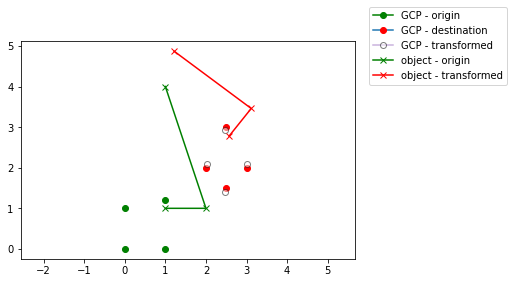

In [23]:
fig, ax = plt.subplots()
for p in origin_gcp:
    i = origin_gcp.index(p)
    gpg.plot_shapely_obj(obj=p, ax=ax, color='g', marker='o', label='GCP - origin' if i == 0 else '_no_legend_')
for p in destination_gcp:
    i = destination_gcp.index(p)
    gpg.plot_shapely_obj(obj=p, ax=ax, markeredgecolor='r', markerfacecolor='r', marker='o', label='GCP - destination' if i == 0 else '_no_legend_')
for p in transformed_gcp:
    i = transformed_gcp.index(p)
    gpg.plot_shapely_obj(obj=p, ax=ax, markeredgecolor='k', markerfacecolor='w', marker='o', alpha=0.5, label='GCP - transformed' if i == 0 else '_no_legend_')
    
gpg.plot_shapely_obj(obj=ls, ax=ax, color='g', marker='x', label='object - origin')
gpg.plot_shapely_obj(obj=Ls, ax=ax, color='r', marker='x', label='object - transformed')
ax.axis('equal')
fig.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)